In [2]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [8]:
y = np.where(df.default == 2, 1, 0)
pd.Series(y).value_counts()

0    700
1    300
dtype: int64

In [10]:
X = df.copy()
del X["default"]
X = pd.get_dummies(X, drop_first=True)

In [28]:
%%time
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 2, 
                                include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C = 0.1, random_state = 1))
])
scores = model_selection.cross_val_score(pipe, X = X, y = y, 
                                         verbose=True, cv = 5)
print("Avg score: ", np.mean(scores), scores)

Avg score:  0.726 [ 0.72   0.74   0.735  0.69   0.745]
CPU times: user 2.08 s, sys: 65.4 ms, total: 2.14 s
Wall time: 2.15 s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                , y, test_size = 0.3, random_state = 1230)

In [16]:
pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)

In [18]:
pd.DataFrame({"true": y_test, "predicted": y_test_pred}) 

,predicted,true
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,1,1
7,0,0
8,0,0
9,0,0


In [20]:
metrics.confusion_matrix(y_test_pred, y_test)

array([[192,  48],
       [ 20,  40]])

In [21]:
from mlxtend.plotting import plot_confusion_matrix

(<matplotlib.figure.Figure at 0x1a1b36e470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1b36eba8>)

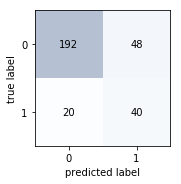

In [23]:
plot_confusion_matrix(metrics.confusion_matrix(y_test_pred, y_test))

In [24]:
(192 + 40 ) / len(y_test)

0.7733333333333333

In [25]:
pipe.score(X_test, y_test)

0.77333333333333332